In [7]:
#%pip install jours-feries-france
#%pip install vacances-scolaires-france

  Preparing metadata (setup.py) ... done
  Created wheel for jours-feries-france: filename=jours_feries_france-0.7.0-py3-none-any.whl size=4979 sha256=3f05ee09f3c6a8ec3c9b87c83d5d29be8fa8337c797996385506a822e1fa7cbf
  Stored in directory: /Users/heloise_cammerman/Library/Caches/pip/wheels/ba/a1/af/b17ef7e2b231167f33e18a6b819a6799d4c23027881d285772
Successfully built jours-feries-france
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vacances_scolaires_france import SchoolHolidayDates
import jours_feries_france as jff
from datetime import date

In [9]:
# lecture du csv
df_initial=pd.read_csv('consommation-quotidienne-brute.csv', delimiter = ";") 

In [10]:
# apperçu du dataframe
df_initial.head()
df_initial.shape

(242544, 12)

In [11]:
242544/2 - 121172

100.0

In [12]:
# suppression des valeurs nulles
df = df_initial.dropna() # on enlève les valeurs nulles
df.shape

(121172, 12)

In [13]:
# apperçu du nouveau dataframe
df.head()

,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW),flag_ignore
1,2025-10-31T22:00:00+00:00,31/10/2025,23:00,28185.0,Définitif,1430.0,Définitif,29615.0,48270,Consolidé,77885.0,non
3,2025-10-31T21:00:00+00:00,31/10/2025,22:00,30073.0,Définitif,1515.0,Définitif,31588.0,47881,Consolidé,79469.0,non
5,2025-10-31T20:00:00+00:00,31/10/2025,21:00,32654.0,Définitif,1705.0,Définitif,34359.0,48527,Consolidé,82886.0,non
7,2025-10-31T19:00:00+00:00,31/10/2025,20:00,34212.0,Définitif,1830.0,Définitif,36042.0,51096,Consolidé,87138.0,non
9,2025-10-31T18:00:00+00:00,31/10/2025,19:00,35352.0,Définitif,1922.0,Définitif,37274.0,53612,Consolidé,90886.0,non


In [14]:
# affichage de toutes les colonnes
df.columns

Index(['Date - Heure', 'Date', 'Heure',
       'Consommation brute gaz (MW PCS 0°C) - NaTran', 'Statut - NaTran',
       'Consommation brute gaz (MW PCS 0°C) - Teréga', 'Statut - Teréga',
       'Consommation brute gaz totale (MW PCS 0°C)',
       'Consommation brute électricité (MW) - RTE', 'Statut - RTE',
       'Consommation brute totale (MW)', 'flag_ignore'],
      dtype='object')

# Ajout de colonnes calendaires

In [15]:
# Conversion de la colonne Date pour pouvoir en extraire les jours de la semaine etc
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/18859026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


In [16]:
# création des nouvelles variables dates
df['jour'] = df['Date'].dt.day
df['mois'] = df['Date'].dt.month
df['annee'] = df['Date'].dt.year
df['jour_semaine'] = df['Date'].dt.day_name(locale='fr_FR')
df['jour_semaine_num'] = df['Date'].dt.weekday  # lundi=0
df['week_end'] = df['jour_semaine_num'] >= 5 # booleen

/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/1338966208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jour'] = df['Date'].dt.day
/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/1338966208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mois'] = df['Date'].dt.month
/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/1338966208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [17]:
# création de booleens pour les vacances scolaires par zones
cal = SchoolHolidayDates()
zones = ['A', 'B', 'C']

for zone in zones:
    df[f'vacances_zone_{zone}'] = [cal.is_holiday_for_zone(d.date(), zone) if pd.notnull(d) else False for d in df['Date']]

/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/229110668.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'vacances_zone_{zone}'] = [cal.is_holiday_for_zone(d.date(), zone) if pd.notnull(d) else False for d in df['Date']]
/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/229110668.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'vacances_zone_{zone}'] = [cal.is_holiday_for_zone(d.date(), zone) if pd.notnull(d) else False for d in df['Date']]
/var/folders/1c/9s

In [18]:
df.head()

,Date - Heure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,...,flag_ignore,jour,mois,annee,jour_semaine,jour_semaine_num,week_end,vacances_zone_A,vacances_zone_B,vacances_zone_C
1,2025-10-31T22:00:00+00:00,2025-10-31,23:00,28185.0,Définitif,1430.0,Définitif,29615.0,48270,Consolidé,...,non,31,10,2025,Vendredi,4,False,True,True,True
3,2025-10-31T21:00:00+00:00,2025-10-31,22:00,30073.0,Définitif,1515.0,Définitif,31588.0,47881,Consolidé,...,non,31,10,2025,Vendredi,4,False,True,True,True
5,2025-10-31T20:00:00+00:00,2025-10-31,21:00,32654.0,Définitif,1705.0,Définitif,34359.0,48527,Consolidé,...,non,31,10,2025,Vendredi,4,False,True,True,True
7,2025-10-31T19:00:00+00:00,2025-10-31,20:00,34212.0,Définitif,1830.0,Définitif,36042.0,51096,Consolidé,...,non,31,10,2025,Vendredi,4,False,True,True,True
9,2025-10-31T18:00:00+00:00,2025-10-31,19:00,35352.0,Définitif,1922.0,Définitif,37274.0,53612,Consolidé,...,non,31,10,2025,Vendredi,4,False,True,True,True


In [19]:
# calcul des jours feriés
jours_feries = set()
for annee in range(2012, 2026):
    jf_dict = jff.JoursFeries.for_year(annee)
    for k, v in jf_dict.items():
        if isinstance(v, (pd.Timestamp, pd.Timestamp.__class__)):
            jours_feries.add(v.date())  # transformer en date
        elif hasattr(v, 'year'):  # pour datetime.date
            jours_feries.add(v)
        # sinon ignorer les clés qui sont juste des noms de fête

# Comparaison correcte
df['jour_ferie'] = df['Date'].dt.date.isin(jours_feries)

/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/2906468544.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jour_ferie'] = df['Date'].dt.date.isin(jours_feries)


# Ajout de données météo

In [20]:
import requests

url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": 48.8566,
    "longitude": 2.3522,
    "start_date": "2012-01-01",
    "end_date": "2025-10-31",
    "hourly": [
        "temperature_2m",
        "apparent_temperature",
        "relative_humidity_2m",
        "wind_speed_10m",
        "cloud_cover",
        "surface_pressure"
    ],
    "timezone": "Europe/Paris"
}

response = requests.get(url, params=params)
data = response.json()

weather = pd.DataFrame({
    "timestamp": pd.to_datetime(data["hourly"]["time"]),
    "temp": data["hourly"]["temperature_2m"],
    "temp_feels": data["hourly"]["apparent_temperature"],
    "humidity": data["hourly"]["relative_humidity_2m"],
    "wind_speed": data["hourly"]["wind_speed_10m"],
    "cloud_cover": data["hourly"]["cloud_cover"],
    "pressure": data["hourly"]["surface_pressure"]
})

weather.head()

,timestamp,temp,temp_feels,humidity,wind_speed,cloud_cover,pressure
0,2012-01-01 00:00:00,12.1,9.5,95,20.8,100,1012.1
1,2012-01-01 01:00:00,12.1,9.7,94,19.0,100,1011.9
2,2012-01-01 02:00:00,12.1,9.6,92,19.2,100,1011.5
3,2012-01-01 03:00:00,12.0,9.3,93,20.0,100,1011.6
4,2012-01-01 04:00:00,11.8,8.9,91,20.8,100,1011.7


In [21]:
# mise au même format date pour pouvoir fusionner notre df avec les données météo
weather["timestamp"] = pd.to_datetime(weather["timestamp"])
df["Date - Heure"] = pd.to_datetime(df["Date - Heure"])
# enlever la timezone du df
df["Date - Heure"] = df["Date - Heure"].dt.tz_convert(None)

/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/1848594197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date - Heure"] = pd.to_datetime(df["Date - Heure"])
/var/folders/1c/9s421rpn5wb_4f324mq50q5w0000gn/T/ipykernel_25692/1848594197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date - Heure"] = df["Date - Heure"].dt.tz_convert(None)


In [22]:
df = pd.merge(weather, df, how="right", left_on="timestamp", right_on="Date - Heure")
df.head()

,timestamp,temp,temp_feels,humidity,wind_speed,cloud_cover,pressure,Date - Heure,Date,Heure,...,jour,mois,annee,jour_semaine,jour_semaine_num,week_end,vacances_zone_A,vacances_zone_B,vacances_zone_C,jour_ferie
0,2025-10-31 22:00:00,13.8,11.5,79.0,16.0,0.0,1005.1,2025-10-31 22:00:00,2025-10-31,23:00,...,31,10,2025,Vendredi,4,False,True,True,True,False
1,2025-10-31 21:00:00,13.8,11.6,80.0,15.7,0.0,1005.3,2025-10-31 21:00:00,2025-10-31,22:00,...,31,10,2025,Vendredi,4,False,True,True,True,False
2,2025-10-31 20:00:00,13.9,12.0,81.0,14.2,9.0,1005.3,2025-10-31 20:00:00,2025-10-31,21:00,...,31,10,2025,Vendredi,4,False,True,True,True,False
3,2025-10-31 19:00:00,14.6,12.9,79.0,13.8,1.0,1005.2,2025-10-31 19:00:00,2025-10-31,20:00,...,31,10,2025,Vendredi,4,False,True,True,True,False
4,2025-10-31 18:00:00,14.9,13.1,76.0,14.6,1.0,1004.7,2025-10-31 18:00:00,2025-10-31,19:00,...,31,10,2025,Vendredi,4,False,True,True,True,False


In [23]:
df.isna().sum() # nouvelle valeur nulle

timestamp                                       1
temp                                            1
temp_feels                                      1
humidity                                        1
wind_speed                                      1
cloud_cover                                     1
pressure                                        1
Date - Heure                                    0
Date                                            0
Heure                                           0
Consommation brute gaz (MW PCS 0°C) - NaTran    0
Statut - NaTran                                 0
Consommation brute gaz (MW PCS 0°C) - Teréga    0
Statut - Teréga                                 0
Consommation brute gaz totale (MW PCS 0°C)      0
Consommation brute électricité (MW) - RTE       0
Statut - RTE                                    0
Consommation brute totale (MW)                  0
flag_ignore                                     0
jour                                            0


In [24]:
df = df.dropna() # on la supprime

# Suppression des colonnes inutiles

In [25]:
# pour afficher toutes les valeurs différentes de chaque colonne (et touver celle qui ont des valeurs qui ne change jamais)
for col in df.columns:
    print(df[col].name, " : ", df[col].unique())

timestamp  :  <DatetimeArray>
['2025-10-31 22:00:00', '2025-10-31 21:00:00', '2025-10-31 20:00:00',
 '2025-10-31 19:00:00', '2025-10-31 18:00:00', '2025-10-31 17:00:00',
 '2025-10-31 16:00:00', '2025-10-31 15:00:00', '2025-10-31 14:00:00',
 '2025-10-31 13:00:00',
 ...
 '2012-01-01 09:00:00', '2012-01-01 08:00:00', '2012-01-01 07:00:00',
 '2012-01-01 06:00:00', '2012-01-01 05:00:00', '2012-01-01 04:00:00',
 '2012-01-01 03:00:00', '2012-01-01 02:00:00', '2012-01-01 01:00:00',
 '2012-01-01 00:00:00']
Length: 121157, dtype: datetime64[ns]
temp  :  [13.8 13.9 14.6 14.9 15.6 16.  15.7 15.4 14.2 14.4 12.6 10.6  9.6  8.6
  8.5  8.1  8.2  8.4  9.   8.9  9.1  9.4  9.8 10.5 11.1 12.2 13.1 13.5
 13.2 13.  12.  11.   9.5  7.4  9.7 10.2 10.9 11.4 11.6 12.5 13.4 14.3
 13.6 12.4 10.7 10.1 11.5 11.3 12.1 12.8 14.  14.7 15.3 15.2 11.9 11.7
 11.8  9.9 10.3 14.5 14.8 12.7 10.4 10.   9.2  7.8  7.2  7.1  7.   6.9
 11.2  6.2  6.5  6.8  8.  10.8 16.1 15.9 16.2 15.8 15.1 14.1 12.9 12.3
 16.5 16.6 16.4 15.5 13.

In [26]:
# on supprime les colonnes inutiles
df = df.drop(columns=["timestamp", "Date - Heure", # on a déjà la date et l'heure
                      "Statut - Teréga", # n'a que "Définitif" et "Définitive" comme valeurs
                      "flag_ignore" # n'a que "non" comme valeur
                     ])

In [27]:
# affichage du nouveau dataframe avec les colonne en moins
df.head()

,temp,temp_feels,humidity,wind_speed,cloud_cover,pressure,Date,Heure,Consommation brute gaz (MW PCS 0°C) - NaTran,Statut - NaTran,...,jour,mois,annee,jour_semaine,jour_semaine_num,week_end,vacances_zone_A,vacances_zone_B,vacances_zone_C,jour_ferie
0,13.8,11.5,79.0,16.0,0.0,1005.1,2025-10-31,23:00,28185.0,Définitif,...,31,10,2025,Vendredi,4,False,True,True,True,False
1,13.8,11.6,80.0,15.7,0.0,1005.3,2025-10-31,22:00,30073.0,Définitif,...,31,10,2025,Vendredi,4,False,True,True,True,False
2,13.9,12.0,81.0,14.2,9.0,1005.3,2025-10-31,21:00,32654.0,Définitif,...,31,10,2025,Vendredi,4,False,True,True,True,False
3,14.6,12.9,79.0,13.8,1.0,1005.2,2025-10-31,20:00,34212.0,Définitif,...,31,10,2025,Vendredi,4,False,True,True,True,False
4,14.9,13.1,76.0,14.6,1.0,1004.7,2025-10-31,19:00,35352.0,Définitif,...,31,10,2025,Vendredi,4,False,True,True,True,False


In [28]:
# fonction pour afficher la distribution des variables
def plot_distributions(df, max_modalities=20):
    for col in df.columns:
        plt.figure(figsize=(7, 4))

        if pd.api.types.is_numeric_dtype(df[col]):
            # Variable quanti
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Distribution de {col}")
            plt.xlabel(col)
            plt.ylabel("Fréquence")

        else:
            # Variable quali
            counts = df[col].value_counts().head(max_modalities)
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(f"Répartition de {col}")
            plt.xlabel(col)
            plt.ylabel("Effectifs")
            plt.xticks(rotation=45, ha="right")

        plt.tight_layout()
        plt.show()

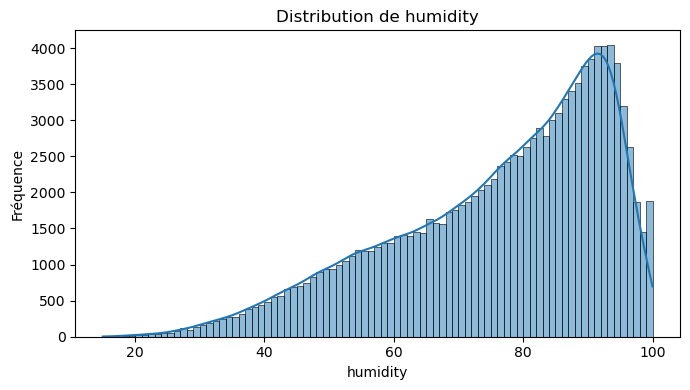

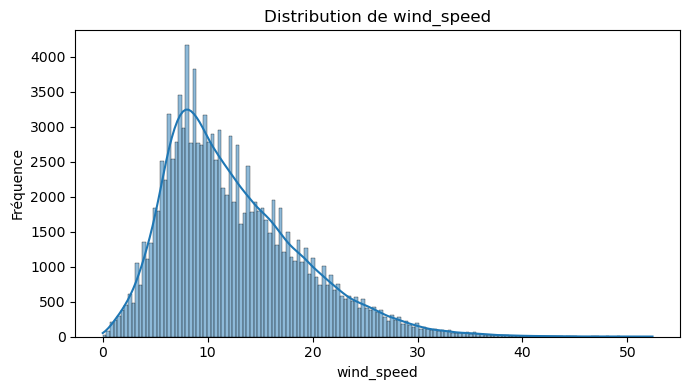

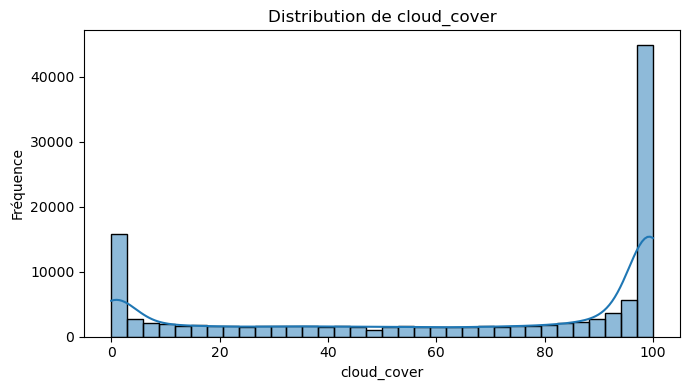

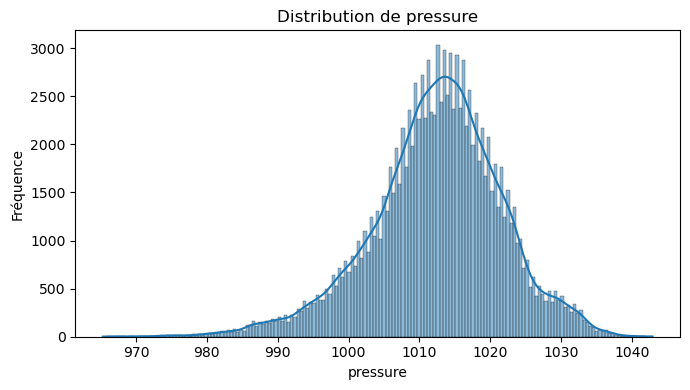

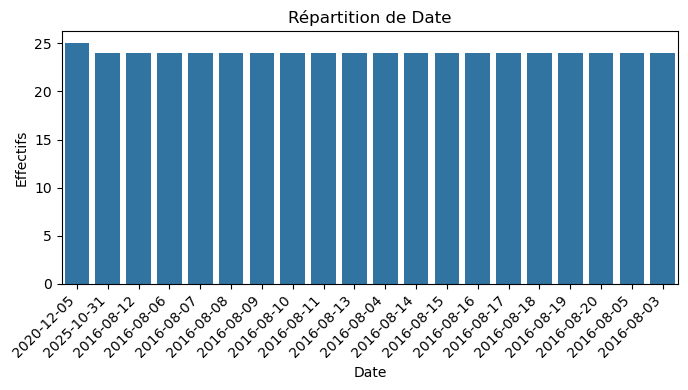

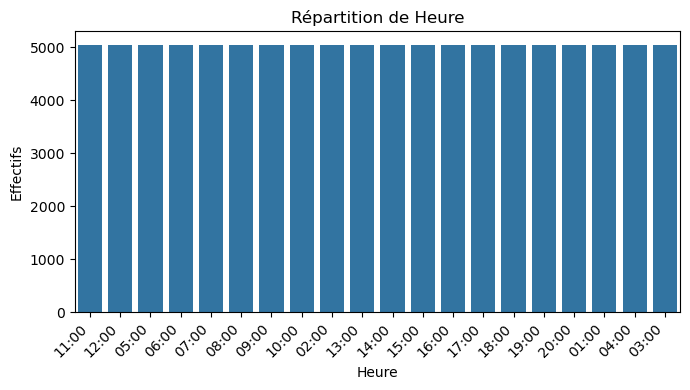

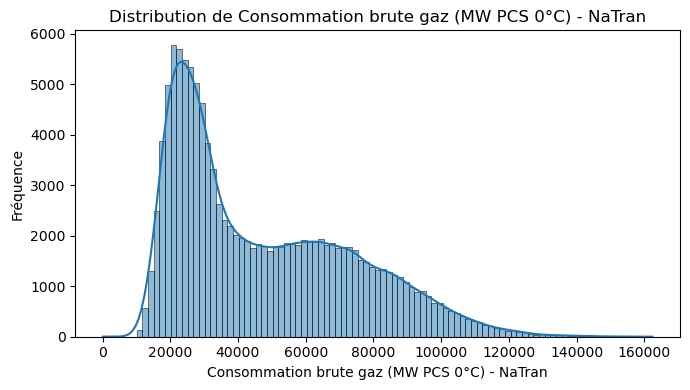

In [29]:
# affichage de la distribution des variables sur les données autre que date
plot_distributions(df[df.columns[2:9]])

In [ ]:
# Affichage de la conso par rapport à la date

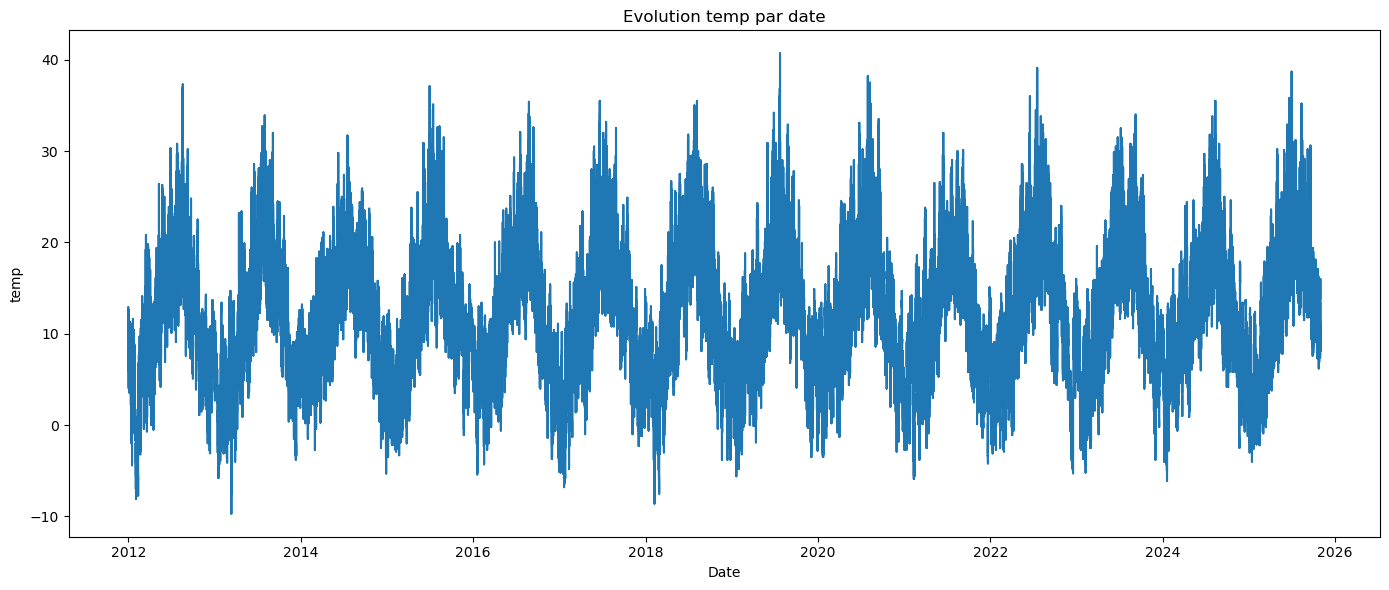

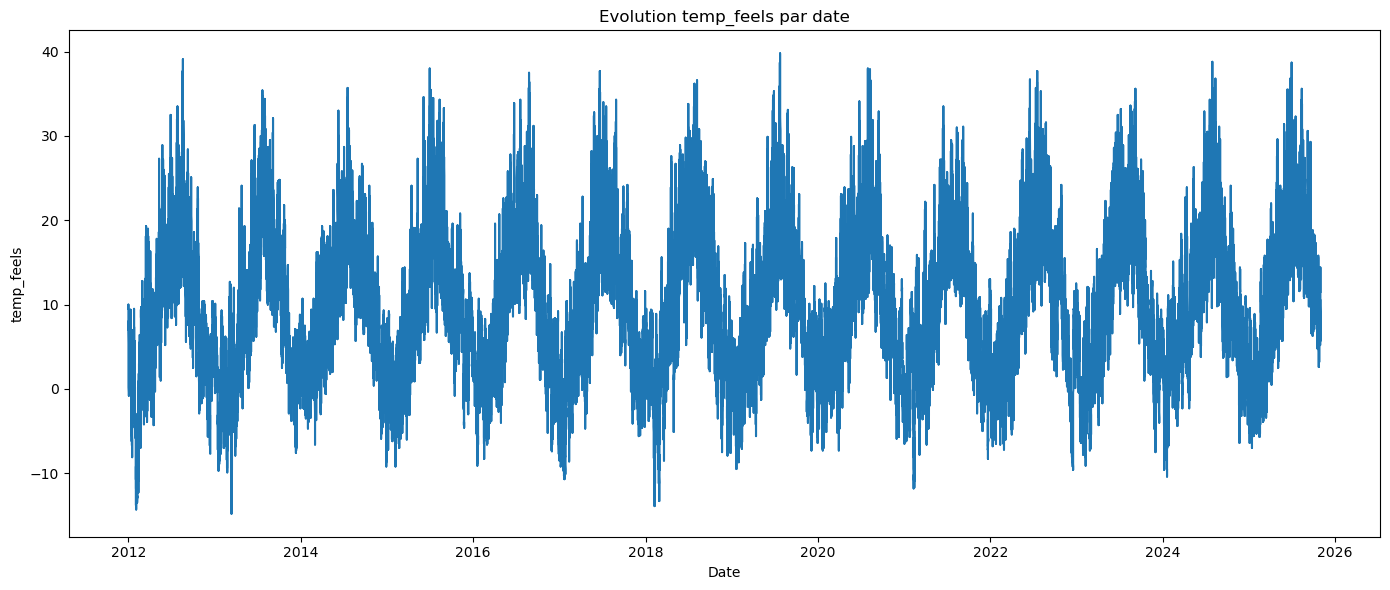

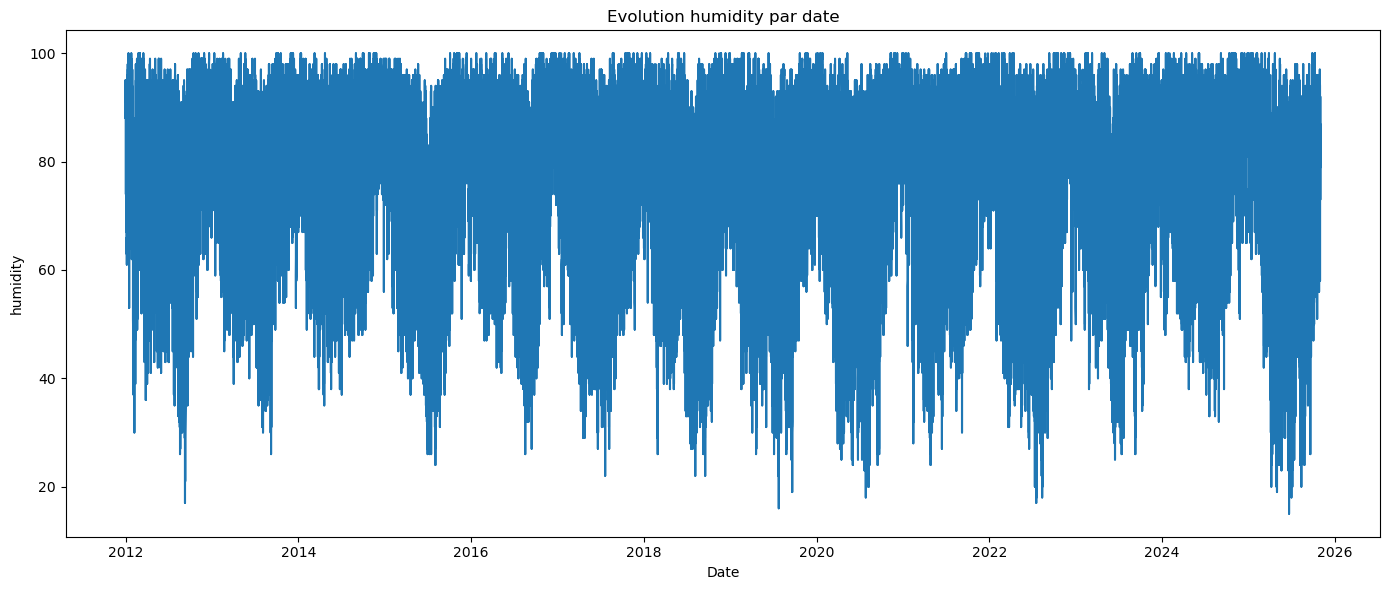

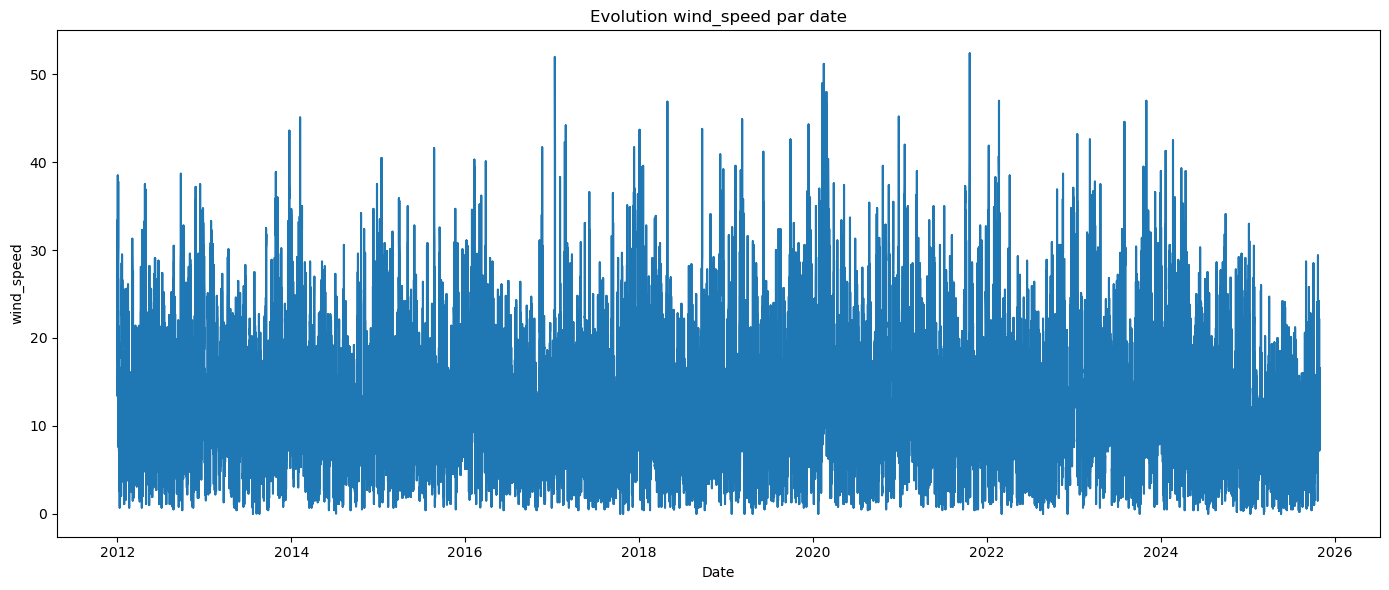

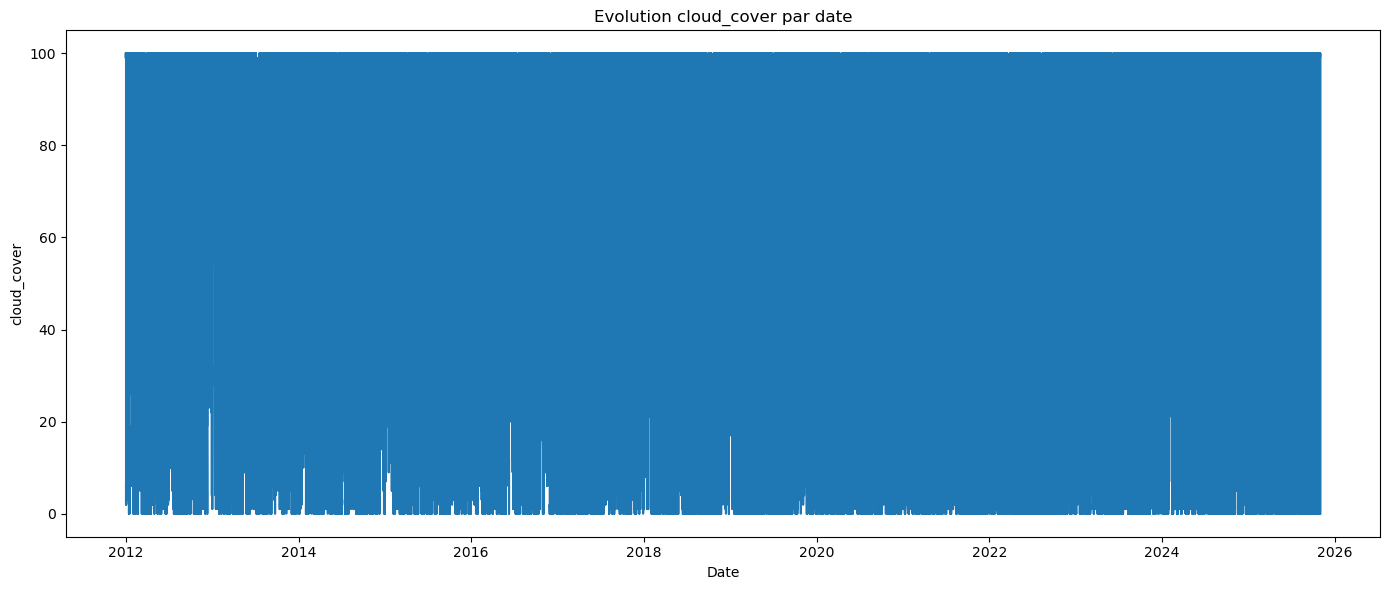

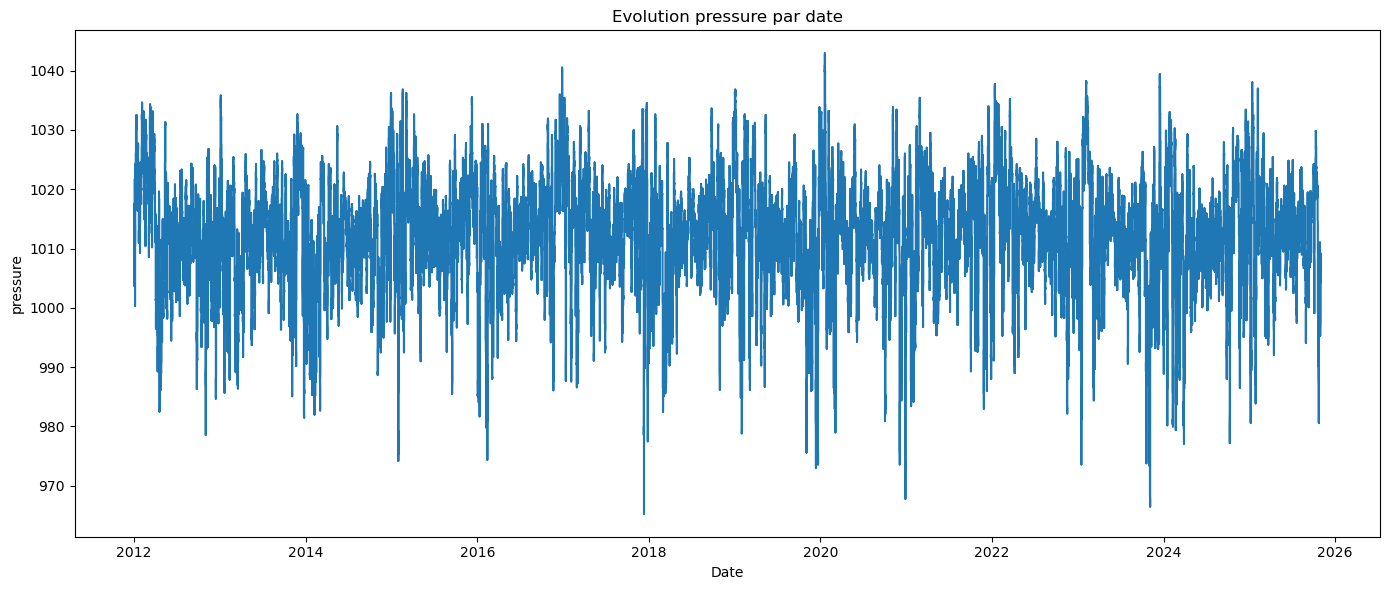

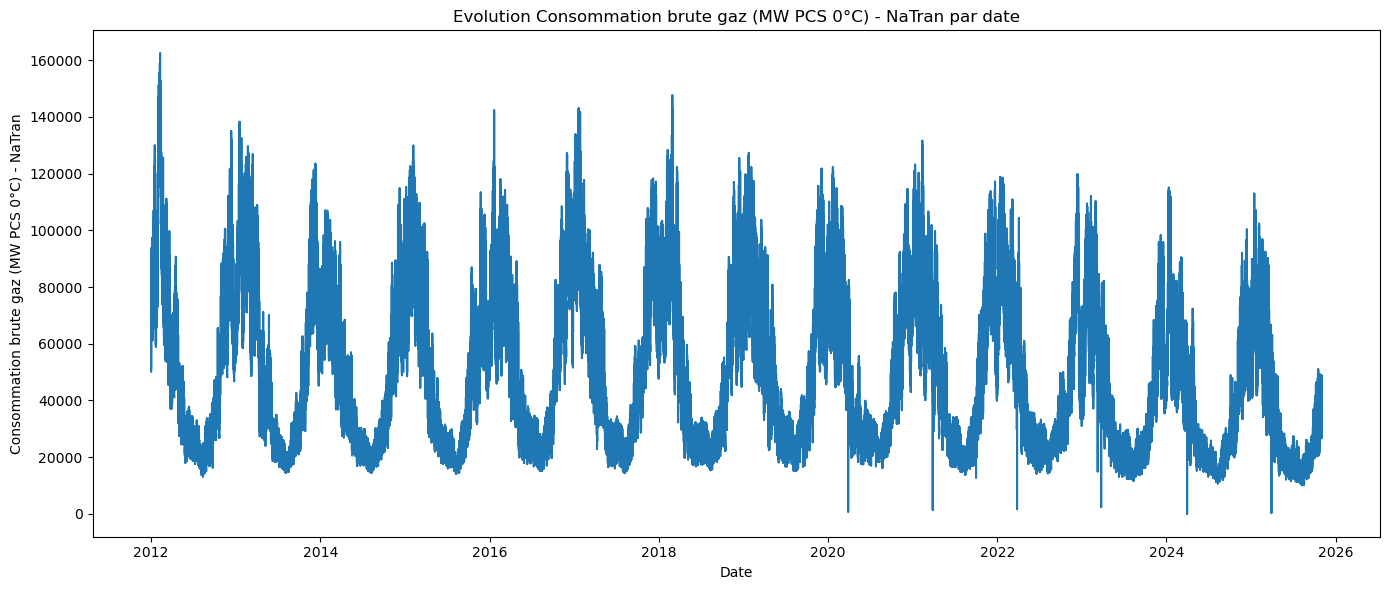

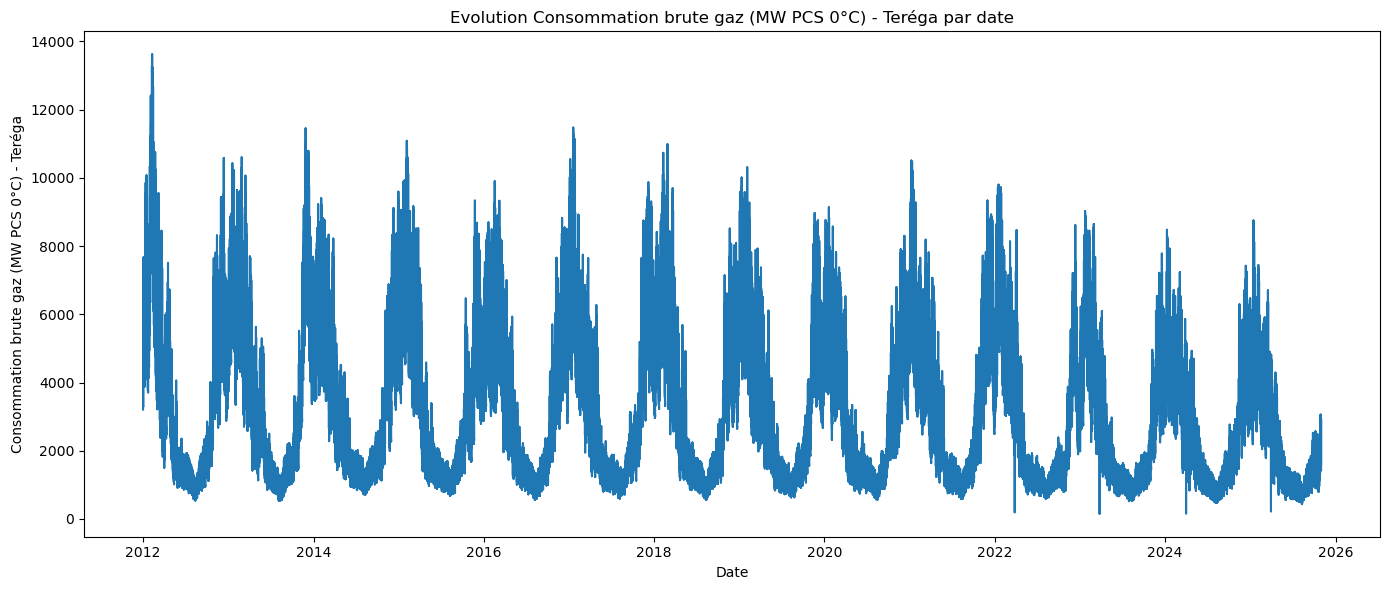

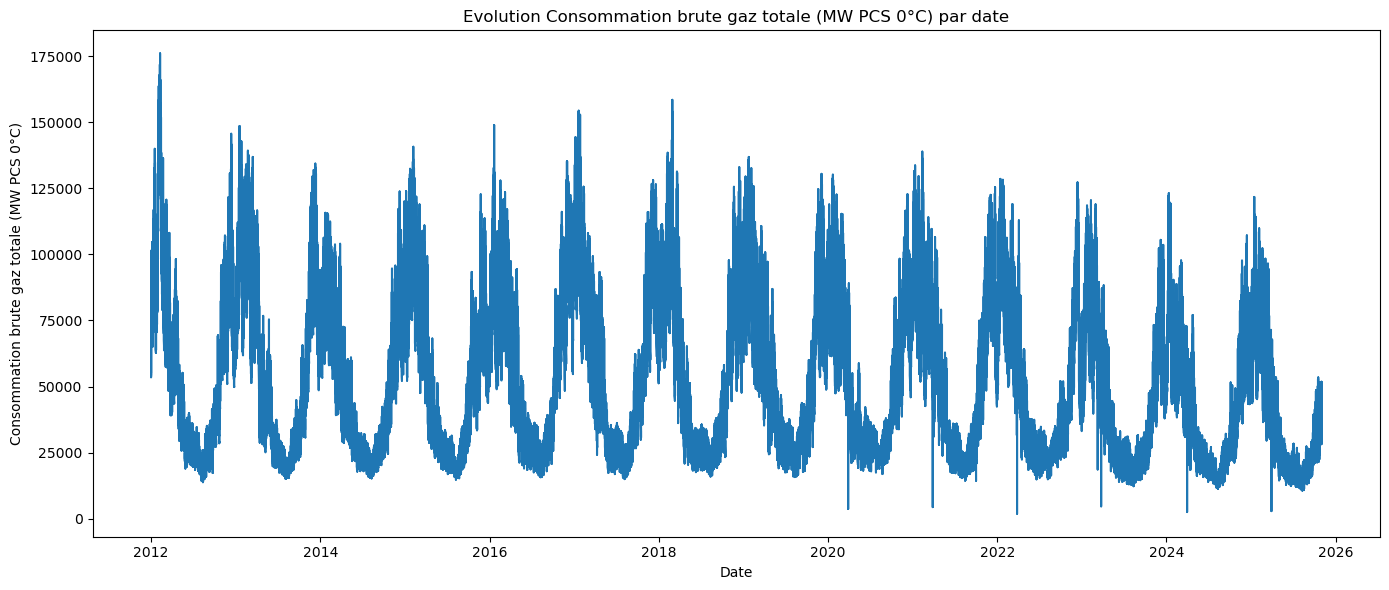

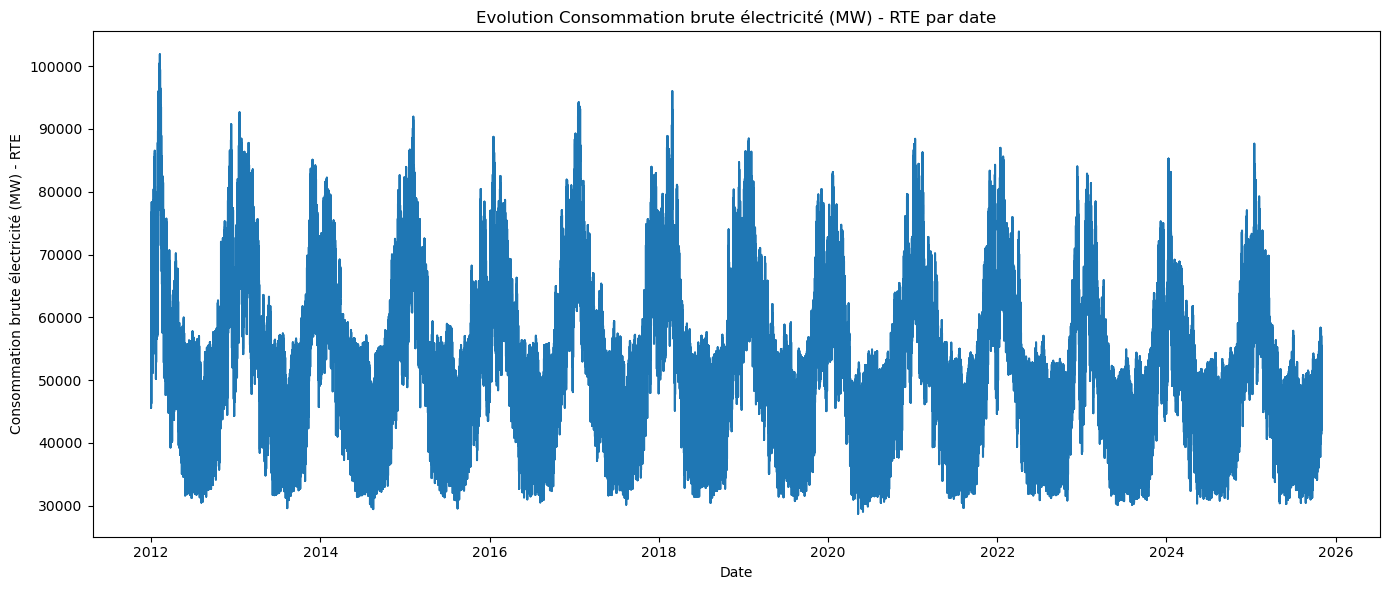

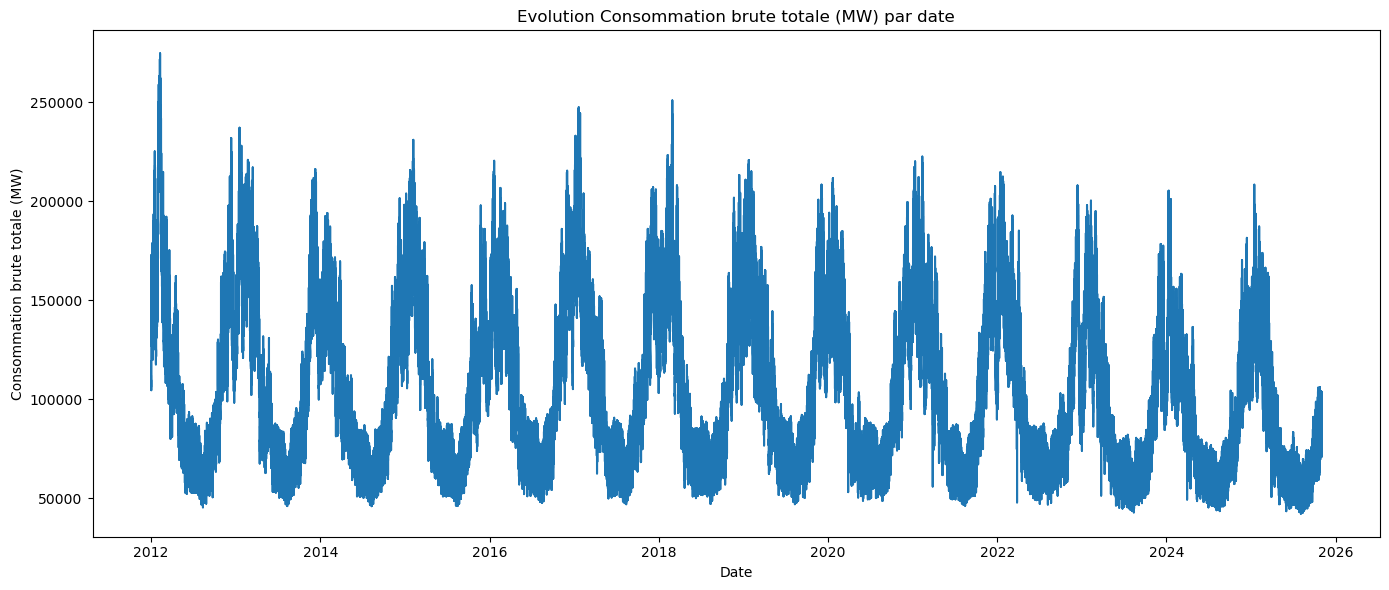

In [30]:
for col in df.iloc[:, [0, 1, 2, 3, 4, 5, 8, 10, 11, 12, 14]]:
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df[col])
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(f"Evolution {col} par date")
    plt.tight_layout()
    plt.show()

# Entrainements des modèles

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [32]:
# création du dataframe pour les modèles
df_model = df.select_dtypes(include=["number", "bool"]).copy() # pour garder uniquement les colonnes numériques

In [33]:
# on ne garde que la Consommation brute totale (MW) comme varaible cible (donc on supprime les autres)
df_model = df_model.drop(columns=["Consommation brute gaz totale (MW PCS 0°C)", "Consommation brute électricité (MW) - RTE",
                                  "Consommation brute gaz (MW PCS 0°C) - NaTran", "Consommation brute gaz (MW PCS 0°C) - Teréga"])#, errors="ignore")

In [34]:
df_model.head()

,temp,temp_feels,humidity,wind_speed,cloud_cover,pressure,Consommation brute totale (MW),jour,mois,annee,jour_semaine_num,week_end,vacances_zone_A,vacances_zone_B,vacances_zone_C,jour_ferie
0,13.8,11.5,79.0,16.0,0.0,1005.1,77885.0,31,10,2025,4,False,True,True,True,False
1,13.8,11.6,80.0,15.7,0.0,1005.3,79469.0,31,10,2025,4,False,True,True,True,False
2,13.9,12.0,81.0,14.2,9.0,1005.3,82886.0,31,10,2025,4,False,True,True,True,False
3,14.6,12.9,79.0,13.8,1.0,1005.2,87138.0,31,10,2025,4,False,True,True,True,False
4,14.9,13.1,76.0,14.6,1.0,1004.7,90886.0,31,10,2025,4,False,True,True,True,False


## 1. Découpage chronologique

In [35]:
split_index = int(len(df) * 0.8) # découpage du jeu de données en 80 / 20 avec 80 % pour le jeu d'entrainement et 20 % pour le jeu de test

X = df_model.drop(columns=["Consommation brute totale (MW)"])
y = df_model["Consommation brute totale (MW)"]

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

## 2. Les métriques

In [36]:
# fonction de calcul des metriques
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [37]:
# création d'une liste dans laquelle nous allons mettre les résulatats de tous nos modèls
results = list()

## 3. Baseline naive

In [38]:
# cration d'un y_pred et d'un y_test naive pour avoir un modèle de base à comparer avec les autres
y_pred_naive = y_test.shift(1).dropna()
y_test_naive = y_test.loc[y_pred_naive.index]

In [39]:
# ajout du modèle de base
res = evaluate(y_test_naive, y_pred_naive)
res["Model"] = "Baseline (t-1)"
results.append(res)

In [40]:
results

[{'MAE': 3217.87661962532,
  'RMSE': 4550.130961234042,
  'R2': 0.9886096679673253,
  'Model': 'Baseline (t-1)'}]

## 4. Modeles ML

In [41]:
# Modèle linéaire (référence)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # entrainement du modèle
results.append({**evaluate(y_test, lin_reg.predict(X_test)), "Model": "Linear Regression"}) # ajout des résultats dans la liste results

In [42]:
# Random Forest (non linéaire)
rf = RandomForestRegressor(
    n_estimators=100, # 100 mieux que 200 car temps de travail /2 pour une performance casi similaire
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train) # entrainment du modèle
results.append({**evaluate(y_test, rf.predict(X_test)), "Model": "Random Forest"}) # ajout des résultats dans la liste results

In [43]:
# Gradient Boosting (souvent le meilleur)
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train) # entrainment du modèle
results.append({**evaluate(y_test, gbr.predict(X_test)), "Model": "Gradient Boosting"}) # ajout des résultats dans la liste results

In [44]:
# Gradient Boosting (souvent le meilleur)
gbr = GradientBoostingRegressor(
    n_estimators=300, # 2 min 25
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train) # entrainment du modèle
evaluate(y_test, gbr.predict(X_test))

{'MAE': 10418.154477523653,
 'RMSE': 13903.688594914385,
 'R2': 0.8936430628217981}

In [45]:
# Gradient Boosting (souvent le meilleur)
gbr = GradientBoostingRegressor(
    n_estimators=200, # 1 min 38
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train) # entrainment du modèle
evaluate(y_test, gbr.predict(X_test))

{'MAE': 10293.787769408538,
 'RMSE': 13711.652743726545,
 'R2': 0.8965607483968672}

In [46]:
# Gradient Boosting (souvent le meilleur)
gbr = GradientBoostingRegressor(
    n_estimators=100, # 43 sec
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train) # entrainment du modèle
evaluate(y_test, gbr.predict(X_test))

{'MAE': 10578.622705204842,
 'RMSE': 14023.516659995832,
 'R2': 0.8918019017606272}

## 5. Résultats

In [47]:
# affichage des résultats dans un dataframe triés par R²
results_df = pd.DataFrame(results).sort_values("R2", ascending=False)
results_df

,MAE,RMSE,R2,Model
0,3217.876620,4550.130961,0.988610,Baseline (t-1)
3,10418.154478,13903.688595,0.893643,Gradient Boosting
2,10611.506735,14347.713141,0.886741,Random Forest
1,19988.736077,24047.922709,0.681829,Linear Regression
